# Exploratory Visualizations

In this notebook, we seek to perform some simply exploratory analysis. In particular, we will explore how different factors contribute to **success rate** of attacks, and **how many** attacks there are based on factors such as region, weapon type, etc. 

## Setup

We've already created some preprocessing functions in ```preprocessing_functions.py```. We'll load the data and import some packages.

In [1]:
import pandas as pd 
from preprocess_functions import load_data_relevant_cols

In [2]:
raw = load_data_relevant_cols()

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (4,6,8,10,11,12,17,18,24,29,31,33,35,37,38,39,41,43,45,46,47,49,51,53,54,55,57,58,59,60,61,62,63,64,73,76,79,82,84,86,88,90,92,94,96,97,106,108,114,115,121,123,125,126,127,128,129,134) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/akhiljalan/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (6,61,62,63,79,94,96,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
sns.set_style('whitegrid')

# Success Rate Factors

How does **success rate** differ based on certain attributes? For exploratory purposes, let's create some visualizations of success rates against certain attributes of the attack, to see if there is high variance in success rate across certain factors. 

In [156]:
def get_success_tuples(attribute, min_number_attacks=0):
    attribute_vals = raw[attribute].unique()
    out = {}
    for val in attribute_vals: 
        df_subset = raw[raw[attribute] == val]
        if(len(df_subset) <= min_number_attacks): 
            continue 
        success_rate = sum(df_subset['success'])/(len(df_subset))
        out[val] = success_rate
    return sorted(out.items(), key=lambda tup: (tup[1], tup[0]), reverse=True)

In [157]:
def plot_attribute_success(success_tuples, attribute):
    fig = plt.figure(figsize=(12, 6))

    y_pos = np.arange(len(success_tuples))

    plt.bar(y_pos, [x[1] for x in success_tuples])
    plt.xticks(y_pos, [x[0] for x in success_tuples])

    plt.ylabel('Success Rate')
    plt.title('Success Rate of Terrorist Attacks by {}'.format(attribute))
    plt.xticks(rotation=90)
    plt.show();

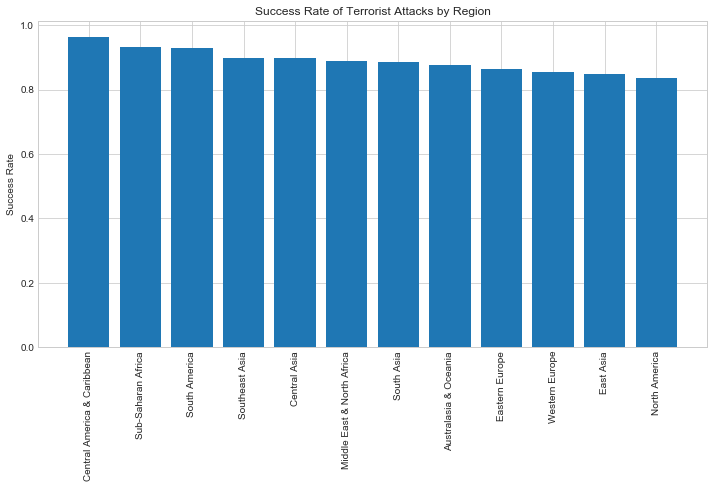

In [158]:
plot_attribute_success(get_success_tuples('region_txt', min_number_attacks=10), 'Region')

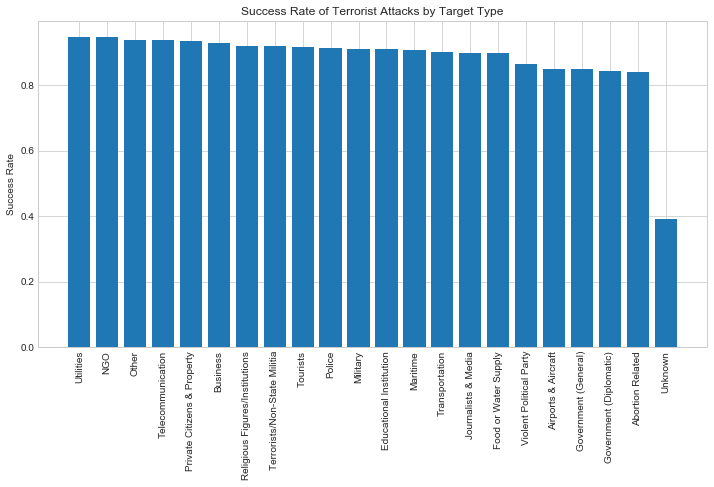

In [159]:
plot_attribute_success(get_success_tuples('targtype1_txt', min_number_attacks=10), 'Target Type')

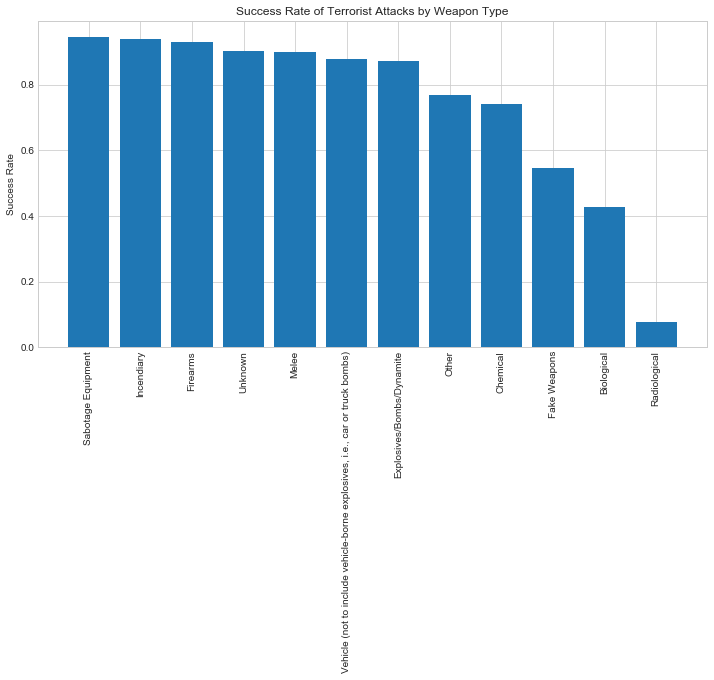

In [160]:
plot_attribute_success(get_success_tuples('weaptype1_txt'), 'Weapon Type')

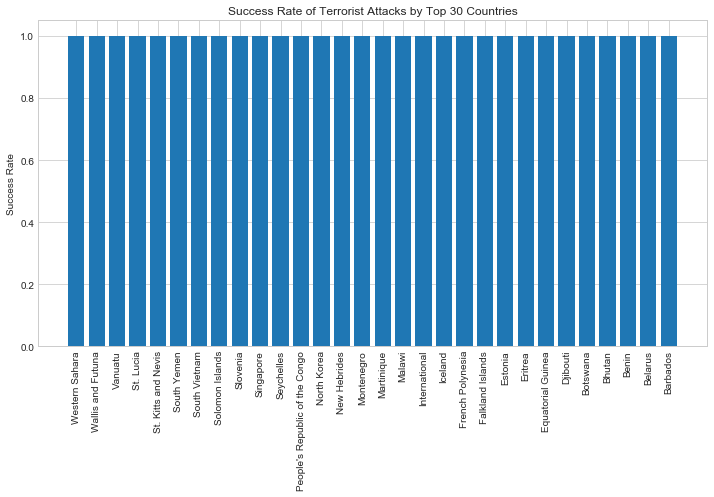

In [131]:
plot_attribute_success(get_success_tuples('country_txt')[:30], 'Top 30 Countries')

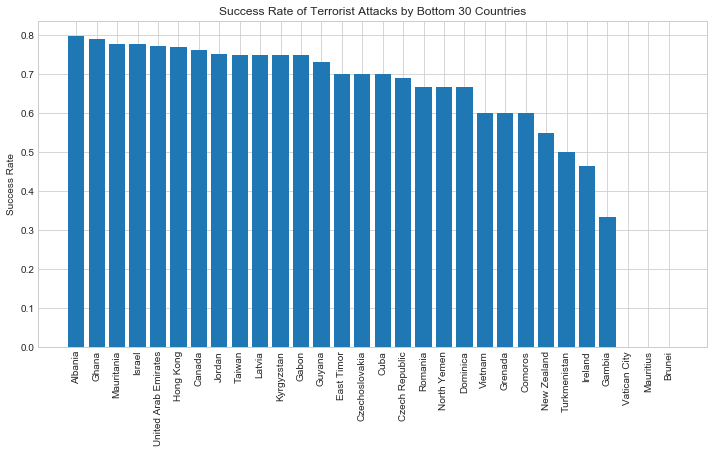

In [132]:
plot_attribute_success(get_success_tuples('country_txt')[-30:], 'Bottom 30 Countries')

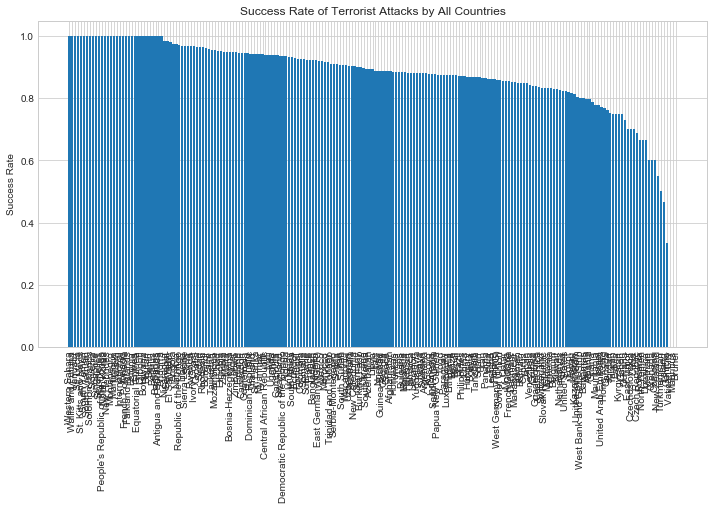

In [133]:
plot_attribute_success(get_success_tuples('country_txt'), 'All Countries')

**Disccussion**: It seems that, with the possible exception of weapon type, there is not much variance in success rates across certain attributes. Success rate across different regions, targets, and nations always seems to hover around 80%. This makes analysis challenging because predictive algorithms might naively predict a successful attack almost all of the time, and still achieve a fairly high success rate. Therefore, we should perform analysis with the avoidance false positives in mind.

## Number of Attacks

What about the **number of attacks** by various attributes, such as region or weapon type? 

In [163]:
def get_num_attacks_tuples(attribute):
    attribute_vals = raw[attribute].unique()
    out = {}
    for val in attribute_vals: 
        df_subset = raw[raw[attribute] == val]
        num_attacks = len(df_subset)
        out[val] = num_attacks
    return sorted(out.items(), key=lambda tup: (tup[1], tup[0]), reverse=True)

def plot_count_by_attribute(num_attacks_tuples, attribute):
    plt.figure(figsize=(12, 6))

    y_pos = np.arange(len(num_attacks_tuples))

    plt.bar(y_pos, [x[1] for x in num_attacks_tuples])
    plt.xticks(y_pos, [x[0] for x in num_attacks_tuples])

    plt.ylabel('Number of Attacks')
    plt.title('Number of Terrorist Attacks by {}'.format(attribute))
    plt.xticks(rotation=90)
    plt.show();

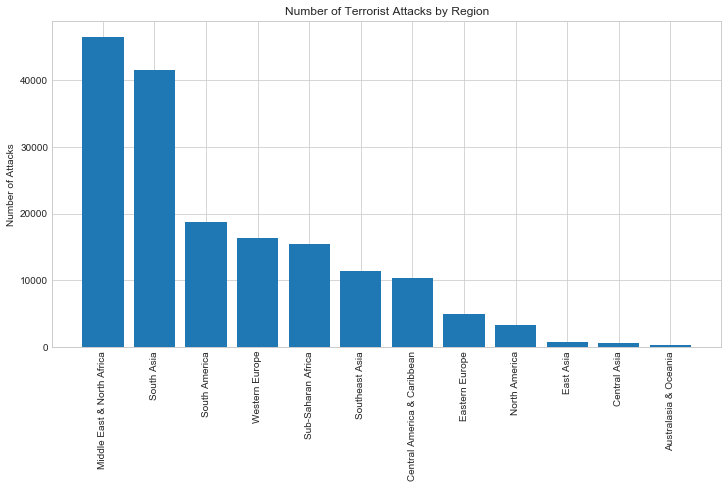

In [154]:
plot_count_by_attribute(get_num_attacks_tuples('region_txt'), 'Region')

Interesting! The Middle East and North Africa, with South Asia as a close second, seem to have around half of all recorded terrorist attacks (out of a total of roughly 170,000). What if we explored the countries?

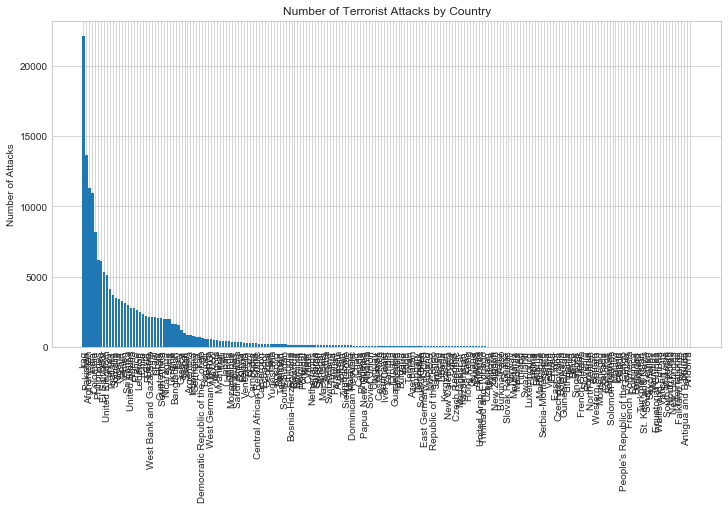

In [164]:
plot_count_by_attribute(get_num_attacks_tuples('country_txt'), 'Country')

This time, the observed exponential decay is even more pronounced. What are the top countries here?

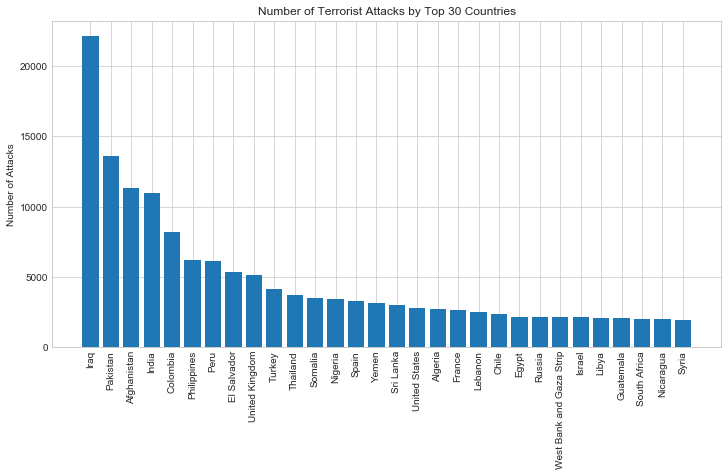

In [165]:
plot_count_by_attribute(get_num_attacks_tuples('country_txt')[:30], 'Top 30 Countries')

Unsurprisingly, the 30 countries with the most recorded terrorist attacks are mostly from the Middle East and North Africa. The top 3 countries - Iraq, Pakistan, and Afghanistan - alone account for about a quarter of the recorded attacks. The UK and US, while making it into the top 30, are numbers 9 and 17 respectively. 

Let's explore other attributes.

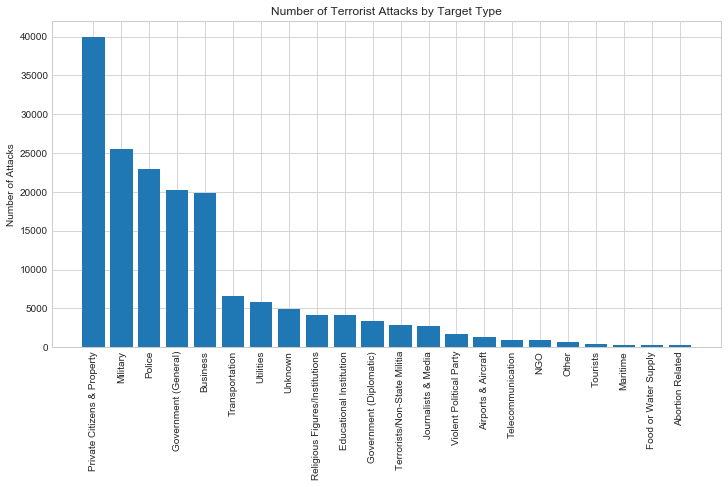

In [166]:
plot_count_by_attribute(get_num_attacks_tuples('targtype1_txt'), 'Target Type')

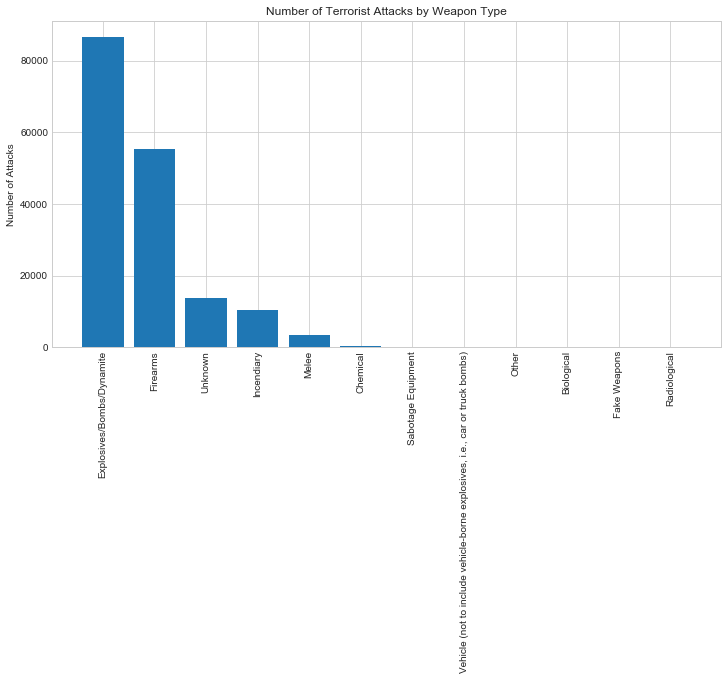

In [167]:
plot_count_by_attribute(get_num_attacks_tuples('weaptype1_txt'), 'Weapon Type')

**Discussion**: Unlike success rates, the number of attacks seems to follow an exponentially decaying distribution for all of the attributes considered. Whether considering region, country, weapon type, or attack type, the lion's share of attacks occur only in a few buckets. 

Given that success rates don't seem to vary much across these factors, this skewing of the data is not that significant for analysis purposes. However, it does matter if one has a more specific objective than simply maximizing attack prevention. For example, if one is interested in preventing attacks on a particular nation, or a particular kind of attack, this would imply a different strategy than the results of a holistic analysis.